In [1]:
import numpy as np
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

h_vec = np.linspace(0.1,1.5,100) 

import matplotlib.pyplot as plt



Text(0.5, 1.0, 'Labor supply as a function of human capital in period 2')

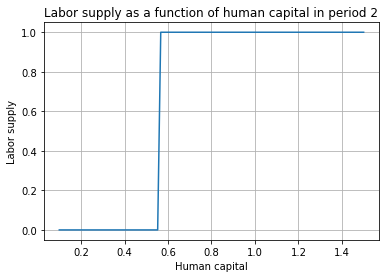

In [2]:
def utility(c, rho): 
    return c**(1-rho)/(1-rho)

def disutility(gamma, l2):
    return gamma*l2 

def cons(w, h, b, l):
    return w*h*l + b*(1-l)

def v2(h2, l2, rho, gamma, w, b): 
    return utility(cons(w, h2, b, l2), rho) - disutility(gamma, l2) 

def v1(l1, w, b, rho, gamma, h1, Delta, beta): # Total utility of the agent. 
    #We calculate the expected total utility of the agant in period 2
    
    h2_low = h1 + l1
    v2_low = v2_interp([h2_low])[0]
    
    # v2 if Delta extra human capital
    h2_high = h1 + l1 + Delta
    v2_high = v2_interp([h2_high])[0]
    
    # expected v2 value
    v2 = 0.5*v2_low + 0.5*v2_high
    
    # total value
    return utility(cons(w, h1, b, l1), rho) - disutility(gamma, l1) + beta*v2


def sp2(rho, w, b, h_vec, gamma, Delta):
    # Solves period 2. 
    #Total utility of not working is greater than the total utility of not working, returns labor that max v2 
    
    # Specifies the grids

    l2_vec = np.empty(100, dtype=int)
    v2_vec = np.empty(100)  
    
    for i,h in enumerate(h_vec):
        if (v2(h, 0, rho, gamma, w, b) > v2(h, 1, rho, gamma, w, b)): 
            l2_vec[i] = 0
        else:
            l2_vec[i] = 1
    return v2_vec, l2_vec

v2_vec, l2_vec = sp2(rho, w, b, h_vec, gamma, Delta)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(h_vec, l2_vec)
ax.grid()
ax.set_ylabel("Labor supply")
ax.set_xlabel("Human capital")
ax.set_title("Labor supply as a function of human capital in period 2")